<a href="https://colab.research.google.com/github/cavadmanafov/transfer-learning-fine-tuning/blob/main/transfer_learning_fine_tuning_learning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Feb 10 19:20:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-02-10 19:20:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-10 19:20:15 (85.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2023-02-10 19:20:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.8MB/s    in 8.1s    

2023-02-10 19:20:27 (19.8 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import tensorflow as tf
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = (224, 224),
                                                                            label_mode = "categorical",
                                                                            batch_size = 32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode = "categorical",
                                                                batch_size = BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = "input_layer")

x = base_model(inputs)

print(f"Shape after passing inputs through base model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_avarage_pooling_layer")(x)

print(f"Shape after passing through global avarge pooling layer: {x.shape} ")

outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_0 = model_0.fit(train_data_10_percent, steps_per_epoch = len(train_data_10_percent), epochs = 5, validation_data = test_data, validation_steps = int(0.25 * len(test_data)), callbacks = [create_tensorboard_callback(dir_name = "transfer_learning", experiment_name =  "10_percent_feature_extraction")])

16705208/16705208 [==============================] - 2s 0us/step


Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after passing through global avarge pooling layer: (None, 1280) 
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230210-192038
Epoch 1/5
24/24 [==============================] - 20s 252ms/step - loss: 0.4390 - accuracy: 0.2067 - val_loss: 0.2896 - val_accuracy: 0.5197
Epoch 2/5
24/24 [==============================] - 4s 135ms/step - loss: 0.2608 - accuracy: 0.6640 - val_loss: 0.2263 - val_accuracy: 0.7632
Epoch 3/5
24/24 [==============================] - 5s 176ms/step - loss: 0.2092 - accuracy: 0.7693 - val_loss: 0.1875 - val_accuracy: 0.8141
Epoch 4/5
24/24 [==============================] - 5s 181ms/step - loss: 0.1788 - accuracy: 0.8080 - val_loss: 0.1647 - val_accuracy: 0.8635
Epoch 5/5
24/24 [==============================] - 5s 176ms/step - loss: 0.1576 - accuracy: 0.8440 - val_loss: 0.1469 - val_accuracy: 0.8684


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 84ms/step - loss: 0.1496 - accuracy: 0.8508


[0.14955581724643707, 0.8507999777793884]

In [ ]:
for layer_number ,layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2023-02-10 19:21:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  24.0MB/s    in 6.4s    

2023-02-10 19:21:30 (20.0 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [ ]:
IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode = "categorical",
                                                                           image_size = IMG_SIZE,
                                                                           batch_size = 32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = IMG_SIZE,
                                                                batch_size = 32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
print(tf.__version__)

2.11.0


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
], name = "data_augmentation")

(-0.5, 449.5, 442.5, -0.5)

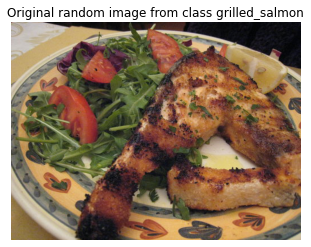

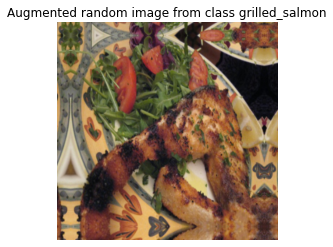

In [ ]:
import matplotlib.pyplot as plt
import random
import os
import matplotlib.image as mpimg

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.axis(False)
plt.title(f"Original random image from class {target_class}")
augmented_img = data_augmentation(tf.expand_dims(img, axis = 0),training = True)
plt.figure()
plt.title(f"Augmented random image from class {target_class}")
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.axis(False)

In [ ]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = input_shape, name = "input_layer")

x = data_augmentation(inputs)

x = base_model(x, training = False)

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)
model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_1 = model_1.fit(train_data_1_percent, epochs = 5, steps_per_epoch = len(train_data_1_percent), validation_data = test_data, validation_steps = int(0.25 * len(test_data)),callbacks = [create_tensorboard_callback(dir_name = "transfer_learning", experiment_name = "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230210-192642
Epoch 1/5


3/3 [==============================] - 14s 2s/step - loss: 2.2470 - accuracy: 0.1429 - val_loss: 2.2066 - val_accuracy: 0.1612
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.0608 - accuracy: 0.3286 - val_loss: 2.0914 - val_accuracy: 0.2516
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.8289 - accuracy: 0.5000 - val_loss: 1.9712 - val_accuracy: 0.3125
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.7052 - accuracy: 0.5571 - val_loss: 1.8753 - val_accuracy: 0.3799
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.5412 - accuracy: 0.6571 - val_loss: 1.7783 - val_accuracy: 0.4375


In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 6s 69ms/step - loss: 1.7927 - accuracy: 0.4280


[1.7926546335220337, 0.42800000309944153]

In [ ]:
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode = "categorical",
                                                                            image_size = IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomRotation(0.2)

], name = "data_augmentation") 
input_shape = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape, name = "input_layer")
x = data_augmentation(inputs)
x = base_model(x, training = False)

x = layers.GlobalAveragePooling2D(name = "global_average_pooling_2d")(x)

outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layers")(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


In [ ]:
checkpoint_path = "ten_percent_checkpoints_weights/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = False,
                                                         save_freq = "epoch",
                                                         verbose = 1)

In [ ]:
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(
    train_data_10_percent,
    epochs = 5,
    steps_per_epoch = len(train_data_10_percent),
    validation_data = test_data,
    validation_steps = int(0.25 * len(test_data)),
    callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                            experiment_name = "10_percent_data_aug"),
                  checkpoint_callback] 
)

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230210-192735
Epoch 1/5


24/24 [==============================] - ETA: 0s - loss: 1.9468 - accuracy: 0.3720
Epoch 1: saving model to ten_percent_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 26s 710ms/step - loss: 1.9468 - accuracy: 0.3720 - val_loss: 1.3758 - val_accuracy: 0.7286
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2987 - accuracy: 0.6827
Epoch 2: saving model to ten_percent_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 14s 581ms/step - loss: 1.2987 - accuracy: 0.6827 - val_loss: 0.9357 - val_accuracy: 0.8076
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9959 - accuracy: 0.7627
Epoch 3: saving model to ten_percent_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 13s 544ms/step - loss: 0.9959 - accuracy: 0.7627 - val_loss: 0.7314 - val_accuracy: 0.8454
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.8229 - accuracy: 0.7933
Epoch 4: saving model t

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 66ms/step - loss: 0.1496 - accuracy: 0.8508


[0.1495557576417923, 0.8507999777793884]

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 77ms/step - loss: 0.6091 - accuracy: 0.8500


[0.6091334819793701, 0.8500000238418579]

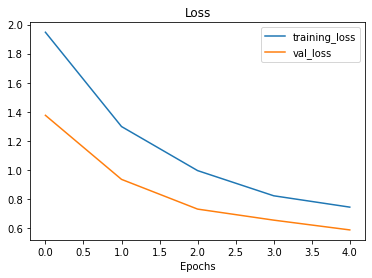

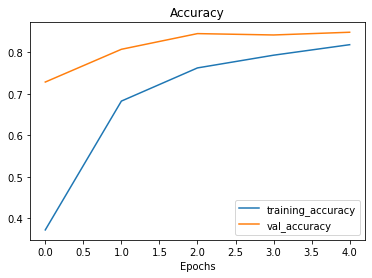

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 7s 79ms/step - loss: 0.6091 - accuracy: 0.8500


In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False
  print(layer.name)

input_6
rescaling_10
normalization_5
rescaling_11
stem_conv_pad
stem_conv
stem_bn
stem_activation
block1a_dwconv
block1a_bn
block1a_activation
block1a_se_squeeze
block1a_se_reshape
block1a_se_reduce
block1a_se_expand
block1a_se_excite
block1a_project_conv
block1a_project_bn
block2a_expand_conv
block2a_expand_bn
block2a_expand_activation
block2a_dwconv_pad
block2a_dwconv
block2a_bn
block2a_activation
block2a_se_squeeze
block2a_se_reshape
block2a_se_reduce
block2a_se_expand
block2a_se_excite
block2a_project_conv
block2a_project_bn
block2b_expand_conv
block2b_expand_bn
block2b_expand_activation
block2b_dwconv
block2b_bn
block2b_activation
block2b_se_squeeze
block2b_se_reshape
block2b_se_reduce
block2b_se_expand
block2b_se_excite
block2b_project_conv
block2b_project_bn
block2b_drop
block2b_add
block3a_expand_conv
block3a_expand_bn
block3a_expand_activation
block3a_dwconv_pad
block3a_dwconv
block3a_bn
block3a_activation
block3a_se_squeeze
block3a_se_reshape
block3a_se_reduce
block3a_se_expa

In [ ]:
model_2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ["accuracy"]
)

In [ ]:
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs = 10,
                                               validation_data = test_data,
                                               validation_steps = int(0.25 * len(test_data)),
                                               steps_per_epoch = len(train_data_10_percent),
                                               initial_epoch = 5,
                                               callbacks = [create_tensorboard_callback(dir_name = "transfer_learning", experiment_name = "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230210-192934


Epoch 6/10


24/24 [==============================] - 25s 534ms/step - loss: 0.6151 - accuracy: 0.8480 - val_loss: 0.4471 - val_accuracy: 0.8717
Epoch 7/10
24/24 [==============================] - 14s 558ms/step - loss: 0.4915 - accuracy: 0.8573 - val_loss: 0.4150 - val_accuracy: 0.8569
Epoch 8/10
24/24 [==============================] - 11s 436ms/step - loss: 0.4429 - accuracy: 0.8680 - val_loss: 0.4319 - val_accuracy: 0.8503
Epoch 9/10
24/24 [==============================] - 11s 460ms/step - loss: 0.3842 - accuracy: 0.9000 - val_loss: 0.4060 - val_accuracy: 0.8701
Epoch 10/10
24/24 [==============================] - 11s 459ms/step - loss: 0.3193 - accuracy: 0.9040 - val_loss: 0.3920 - val_accuracy: 0.8684


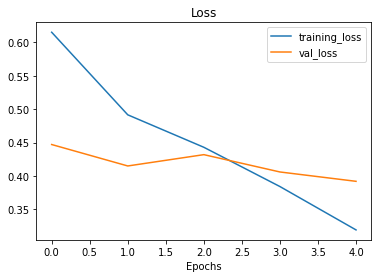

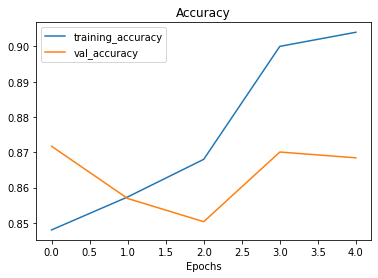

In [ ]:
plot_loss_curves(history_fine_10_percent_data_aug )

In [ ]:
def compare_histories(original_history, new_history, initial_epochs = 5):
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  validation_loss = original_history.history["val_loss"]
  validation_accuracy = original_history.history["val_accuracy"]


  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = validation_accuracy + new_history.history["val_accuracy"]
  total_val_loss = validation_loss + new_history.history["val_loss"]

  plt.figure(figsize = (8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label = "Training accuracy")
  plt.plot(total_val_acc, label = "Validation accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label = "Start fine tuning")
  plt.legend(loc = "lower right")
  plt.title("Training and validation accuracy")

  plt.figure(figsize = (8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label = "Training loss")
  plt.plot(total_val_loss, label = "Validation loss")
  plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label = "Start fine tuning")
  plt.legend(loc = "upper right")
  plt.title("Training and validation loss")

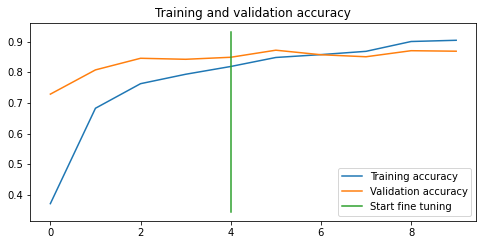

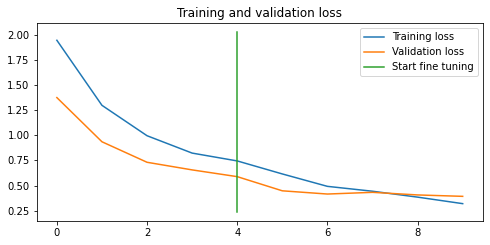

In [ ]:
compare_histories(history_10_percent_data_aug, history_fine_10_percent_data_aug)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2023-02-10 19:30:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.0MB/s    in 22s     

2023-02-10 19:31:20 (22.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [ ]:
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir_all_data,
                                                                                 label_mode = "categorical",
                                                                                 image_size = (224, 224))
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                label_mode = "categorical",
                                                                image_size = (224, 224))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_2.load_weights(checkpoint_path)

ValueError: ignored

In [ ]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

In [ ]:
model_2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ["accuracy"]
)

In [ ]:
history_fine_10_classes_full = model_2.fit(train_data_10_classes_full, epochs = 10, validation_data = test_data, validation_steps = int(0.25 * len(test_data)), initial_epoch = 4, callbacks = [create_tensorboard_callback(dir_name = "transfer_learning", experiment_name = "full_10_classes_fine_tune_last_10")])